# Image SVM
### Importing of libreries

In [ ]:
from google.colab import drive
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import pickle

### Connecting to Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### Loading datasets (Numpy arrays)
Datasets are saved in numpy arrays for load quickly 

In [ ]:
X_train = np.load('/content/drive/MyDrive/ml_dl/immagini-5/training_set/X_train.npy')
y_train = np.load('/content/drive/MyDrive/ml_dl/immagini-5/training_set/y_train.npy')

X_validation = np.load('/content/drive/MyDrive/ml_dl/immagini-5/validation_set/X_val.npy')
y_validation = np.load('/content/drive/MyDrive/ml_dl/immagini-5/validation_set/y_val.npy')

X_test = np.load('/content/drive/MyDrive/ml_dl/immagini-5/test_set/X_test.npy')
y_test = np.load('/content/drive/MyDrive/ml_dl/immagini-5/test_set/y_test.npy')

X = np.load('/content/drive/MyDrive/ml_dl/immagini-5/dataset/X.npy')
y = np.load('/content/drive/MyDrive/ml_dl/immagini-5/dataset/y.npy')

### Selecting best kernel for SVM

In [ ]:
kernel = ['poly', 'rbf', 'sigmoid']
acc = []

for i in kernel:
  svm = make_pipeline(StandardScaler(), SVC(kernel = i))
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_validation)
  a = metrics.accuracy_score(y_validation, y_pred)
  acc.append(a)
  print(i + ': ' + str(a))

poly: 0.8786407766990292
rbf: 0.9022794428028704
sigmoid: 0.6684254959898691


### Kernel performance on validation set

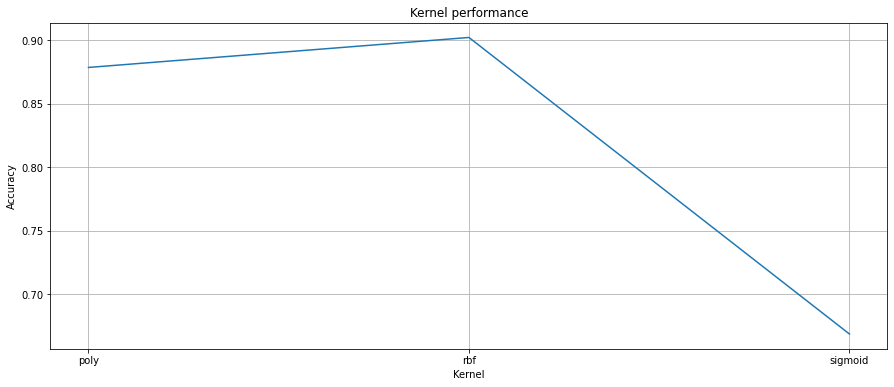

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(kernel, acc)
plt.title("Kernel performance")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

### Creating and fitting the best model

In [ ]:
svm = make_pipeline(StandardScaler(), SVC())
svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

### Testing on test set

In [ ]:
y_pred = svm.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8990506329113924


### 10-fold-Cross Validation

In [ ]:
scores = cross_val_score(svm, X = X, y = y, cv=10)
accuracy_CV10 = np.mean(scores)
print('Cross Validation accuracy: ' + str(accuracy_CV10))

Cross Validation accuracy: 0.8807905557051801


### Saving the model

In [ ]:
filename = "/content/drive/MyDrive/ml_dl/immagini-5/models/svm.pkl"
pickle.dump(svm, open(filename, "wb"))